In [29]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [30]:
def plot_score_results(scores, methods, measure='f1'):
    plt.figure(figsize=(16,8))
    for i in range(len(methods)):
        plt.subplot(1, len(methods), i+1)
        method = methods[i]
        plt.title(measure + ' scores ' + method)
        plt.xlabel('p')
        plt.ylabel(measure)
        plt.errorbar(x=scores.loc[scores['method']==method, 'p'],
                     y=scores.loc[scores['method']==method, 'mean_'+measure],
                     yerr=scores.loc[scores['method']==method, 'std_'+measure],
                     label=method,
                     capsize=8,
                     capthick=3)
    plt.show()

def plot_p_results(p_estimations, min_p, max_p, methods):
    plt.figure(figsize=(16,8))
    for i in range(len(methods)):
        plt.subplot(1, len(methods), i+1)
        method = methods[i]
        plt.title('estimated p ' + method)
        plt.xlabel('true p')
        plt.ylabel('estimated p')
        plt.errorbar(x=np.arange(min_p, max_p+1, 1),
                     y=np.arange(min_p, max_p+1, 1),
                     yerr=0,
                     label='real')
        plt.errorbar(x=p_estimations.loc[p_estimations['method']==method, 'p'],
                     y=p_estimations.loc[p_estimations['method']==method, 'mean_p'],
                     yerr=p_estimations.loc[p_estimations['method']==method, 'std_p'],
                     label=method,
                     capsize=8,
                     capthick=3)
        plt.legend()
    plt.show()
    
def plot_score_comparision(scores, methods, measure='f1'):
    plt.figure(figsize=(16,8))
    plt.title(measure + ' scores compared')
    plt.xlabel('p')
    plt.ylabel(measure)
    for method in methods:
        plt.errorbar(x=scores.loc[scores['method']==method, 'p'],
                     y=scores.loc[scores['method']==method, 'mean_'+measure],
                     yerr=scores.loc[scores['method']==method, 'std_'+measure],
                     label=method,
                     capsize=8,
                     capthick=3)
    plt.legend()
    plt.show()
    
def plot_p_comparision(p_estimations, methods, min_p, max_p):
    plt.figure(figsize=(16,8))
    plt.title('p estimation compared')
    plt.xlabel('true p')
    plt.ylabel('estimated p')
    plt.errorbar(x=np.arange(min_p, max_p+1, 1),
                 y=np.arange(min_p, max_p+1, 1),
                 yerr=0,
                 label='real')
    for method in methods:
        plt.errorbar(x=p_estimations.loc[p_estimations['method']==method, 'p'],
                     y=p_estimations.loc[p_estimations['method']==method, 'mean_p'],
                     yerr=p_estimations.loc[p_estimations['method']==method, 'std_p'],
                     label=method,
                     capsize=8,
                     capthick=3)
    plt.legend()
    plt.show()

# not-extensive approach

#### Results for VAR estimation with different information criterions:

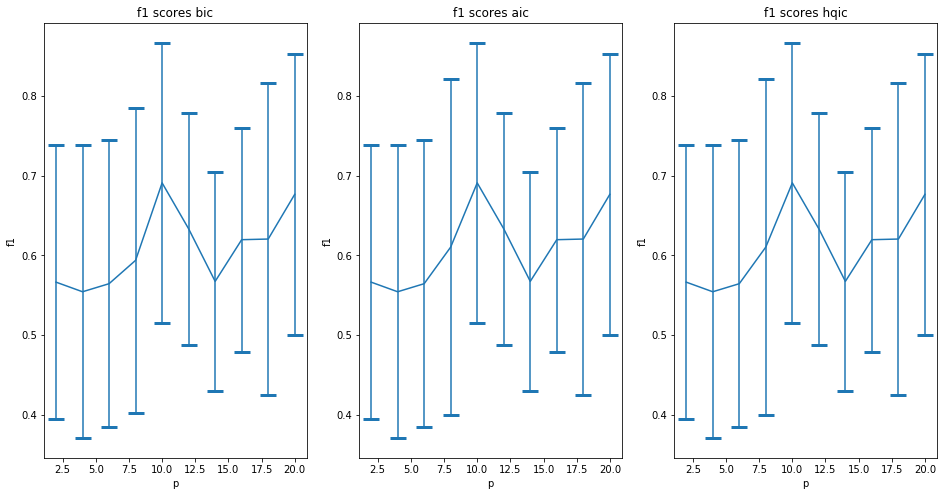

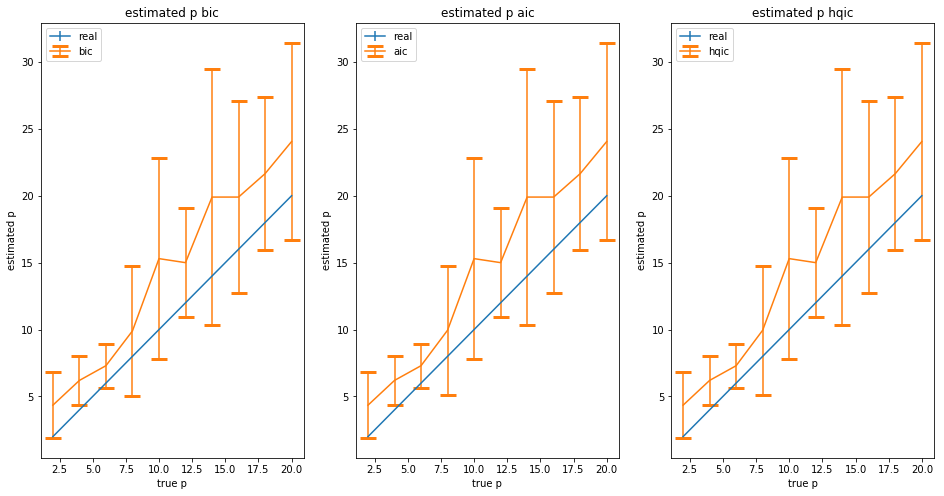

In [31]:
scores = pd.read_csv('results/not_extensive/scores.csv')
p_estimations = pd.read_csv('results/not_extensive/p_estimations.csv')
plot_score_results(scores, methods=['bic', 'aic', 'hqic'], measure='f1')
plot_p_results(p_estimations, min_p=2, max_p=20, methods=['bic', 'aic', 'hqic'])

#### Results for incremental approach with different information critertions:

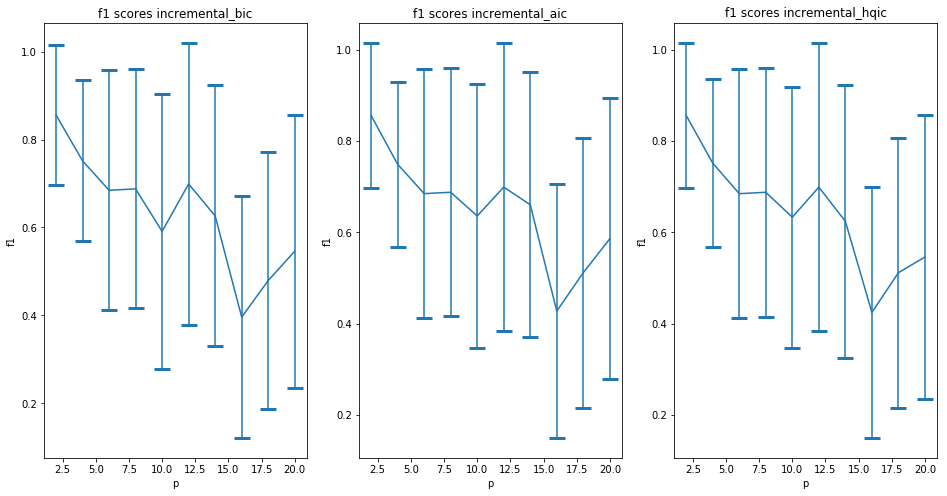

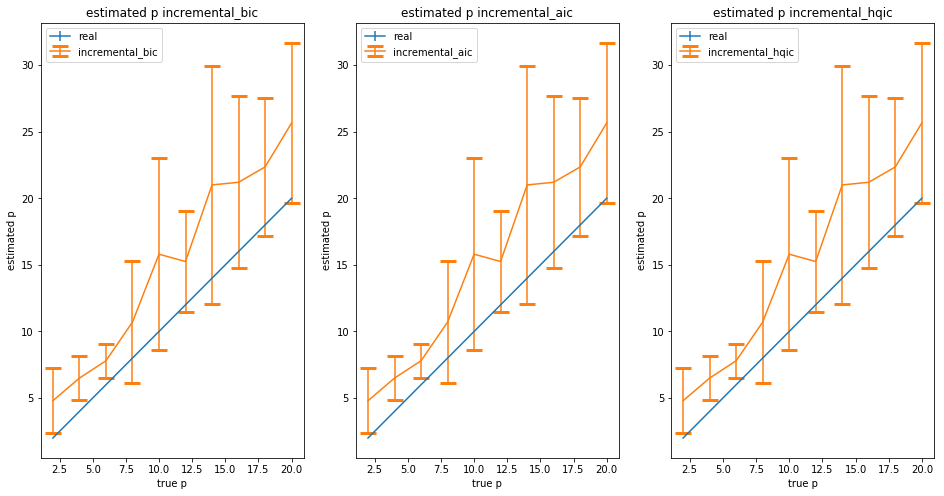

In [32]:
scores = pd.read_csv('results/not_extensive/scores.csv')
p_estimations = pd.read_csv('results/not_extensive/p_estimations.csv')
plot_score_results(scores, methods=['incremental_bic', 'incremental_aic', 'incremental_hqic'], measure='f1')
plot_p_results(p_estimations, min_p=2, max_p=20, methods=['incremental_bic', 'incremental_aic', 'incremental_hqic'])

#### Comparision between incremental, var estimation and Chen with known p:

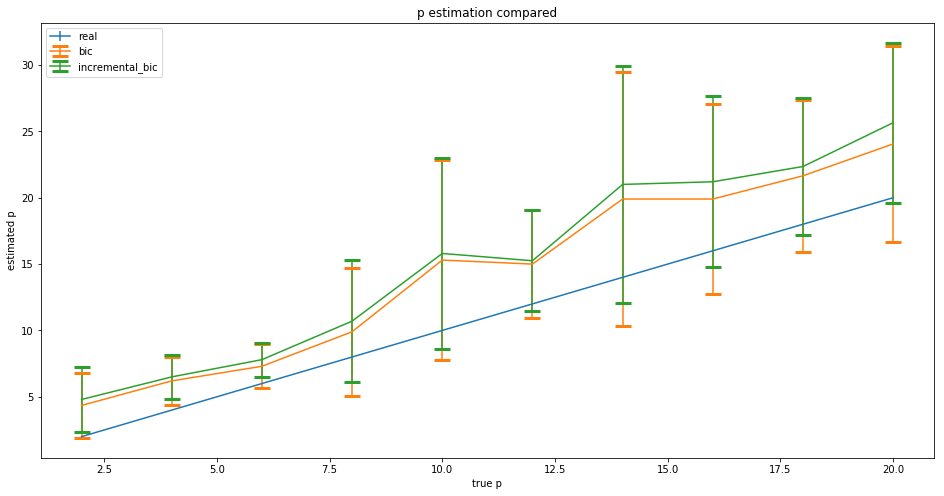

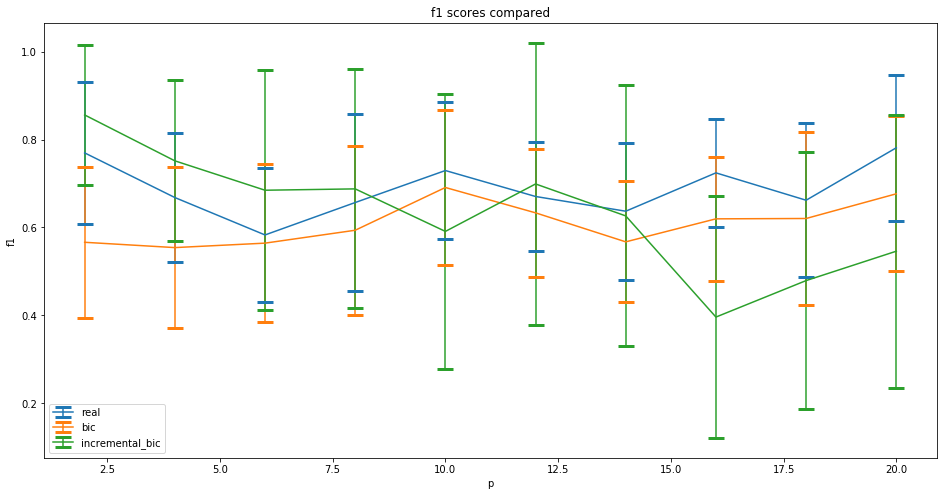

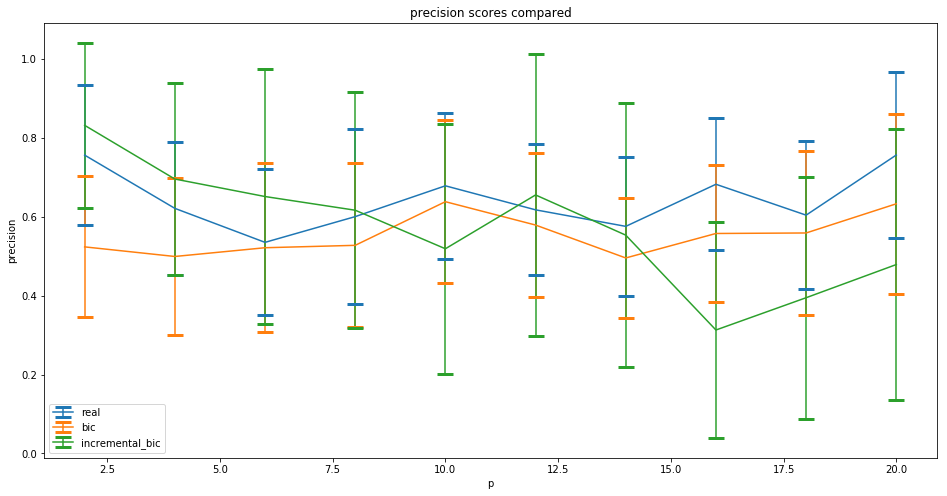

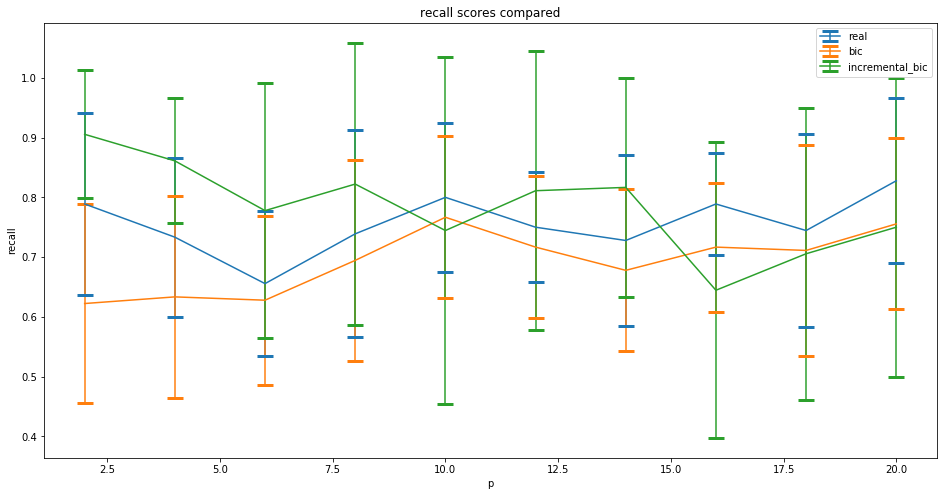

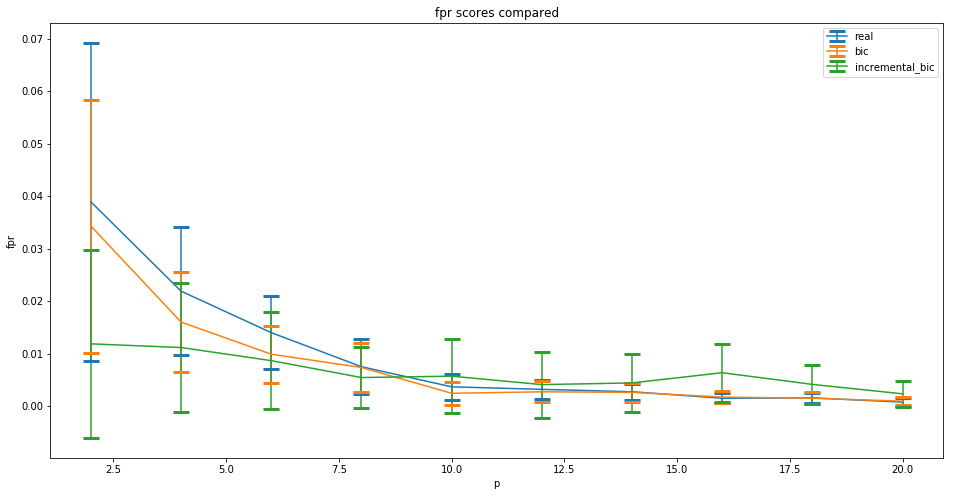

In [33]:
scores = pd.read_csv('results/not_extensive/scores.csv')
p_estimations = pd.read_csv('results/not_extensive/p_estimations.csv')
plot_p_comparision(p_estimations, ['bic', 'incremental_bic'], 2, 20)
plot_score_comparision(scores, ['real', 'bic', 'incremental_bic'], measure='f1')
plot_score_comparision(scores, ['real', 'bic', 'incremental_bic'], measure='precision')
plot_score_comparision(scores, ['real', 'bic', 'incremental_bic'], measure='recall')
plot_score_comparision(scores, ['real', 'bic', 'incremental_bic'], measure='fpr')

# extensive approach

#### Comparision between incremental, var estimation and Chen with known p (using BIC as criterion)

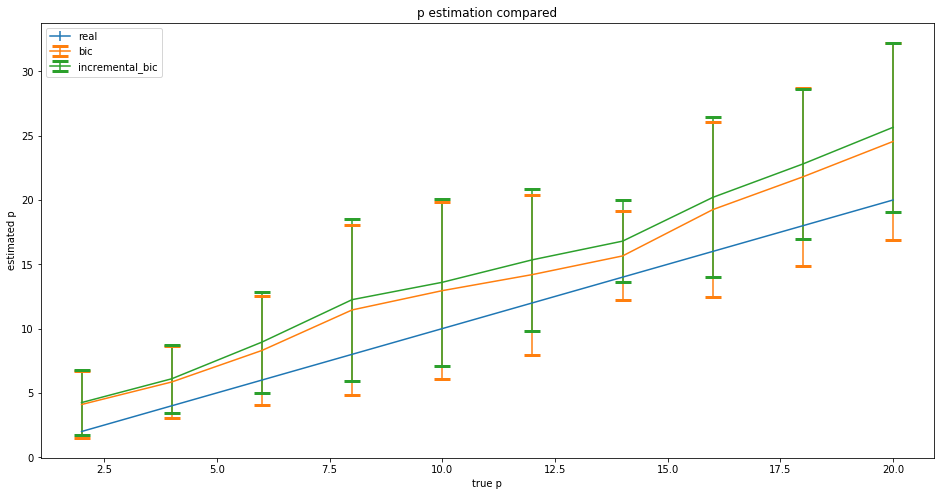

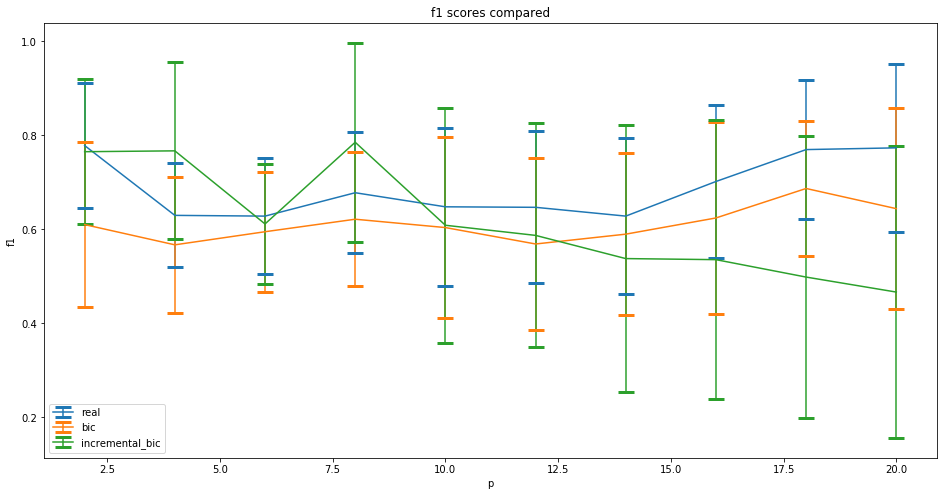

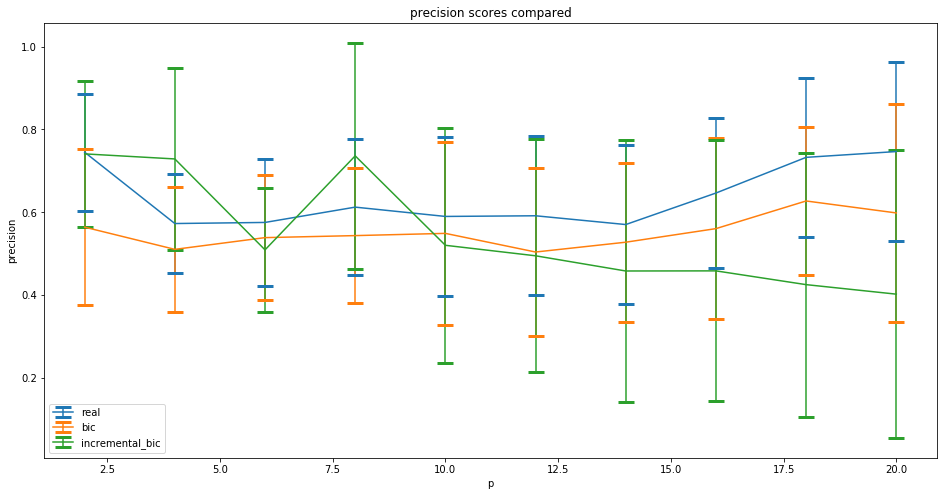

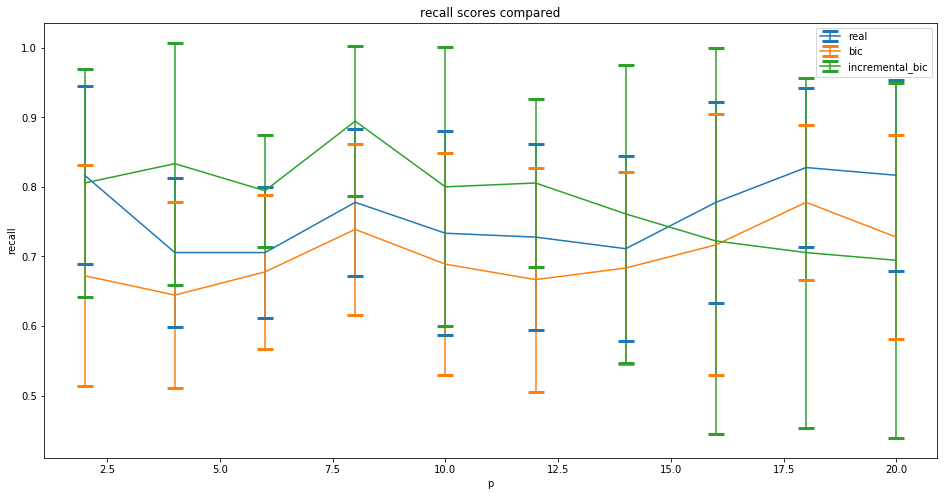

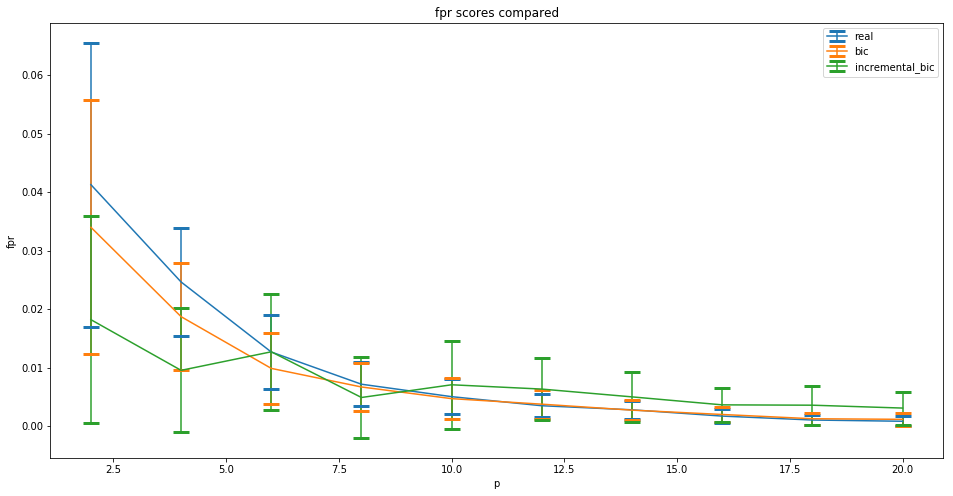

In [34]:
scores = pd.read_csv('results/extensive/scores.csv')
p_estimations = pd.read_csv('results/extensive/p_estimations.csv')
plot_p_comparision(p_estimations, ['bic', 'incremental_bic'], 2, 20)
plot_score_comparision(scores, ['real', 'bic', 'incremental_bic'], measure='f1')
plot_score_comparision(scores, ['real', 'bic', 'incremental_bic'], measure='precision')
plot_score_comparision(scores, ['real', 'bic', 'incremental_bic'], measure='recall')
plot_score_comparision(scores, ['real', 'bic', 'incremental_bic'], measure='fpr')